# Employee Attrition Predictor 
###### Riddhi Gupta, Sonali Shripad Shanbhag, Riya Gupta
Employee attrition is defined as the natural process by which employees leave the workforce – for example, through resignation for personal reasons or retirement – and are not immediately replaced. This project aims to accurately predict whether an employee will leave the company or not based on certain features.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
dataset = pd.read_csv("Employee_Attrition.csv")

In [3]:
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
dataset = dataset.rename(columns = {'sales':'Department'})

### Finding the missing values

In [5]:
dataset.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

### Handling Categorical Data

In [6]:
dataset["Department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
dataset["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [8]:
dataset['Department'] = np.where(dataset['Department']=='support', 'technical', dataset['Department'])
dataset['Department'] = np.where(dataset['Department']=='IT', 'technical', dataset['Department'])

In [9]:
dataset['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

### Data Exploration

In [10]:
dataset['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [11]:
dataset.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [12]:
dataset.groupby('Department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


In [13]:
dataset.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


### Data Visualization

In [14]:
pd.crosstab(dataset.Department, dataset.left)

left,0,1
Department,,
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
technical,4651,1525


<AxesSubplot:xlabel='Department'>

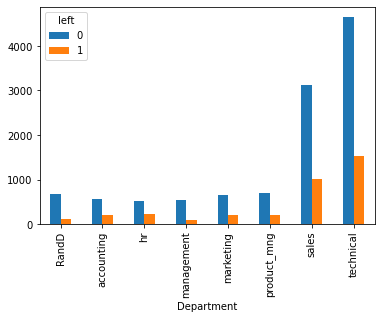

In [15]:
pd.crosstab(dataset.Department, dataset.left).plot(kind = 'bar')

Text(0, 0.5, 'No. of Employees who left')

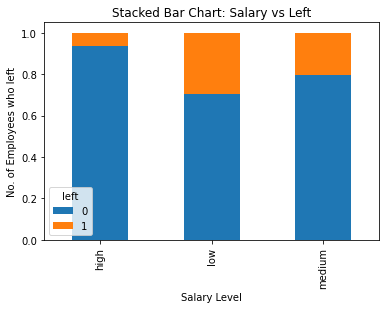

In [16]:
table = pd.crosstab(dataset.salary, dataset.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked=True)
plt.title('Stacked Bar Chart: Salary vs Left')
plt.xlabel('Salary Level')
plt.ylabel('No. of Employees who left')

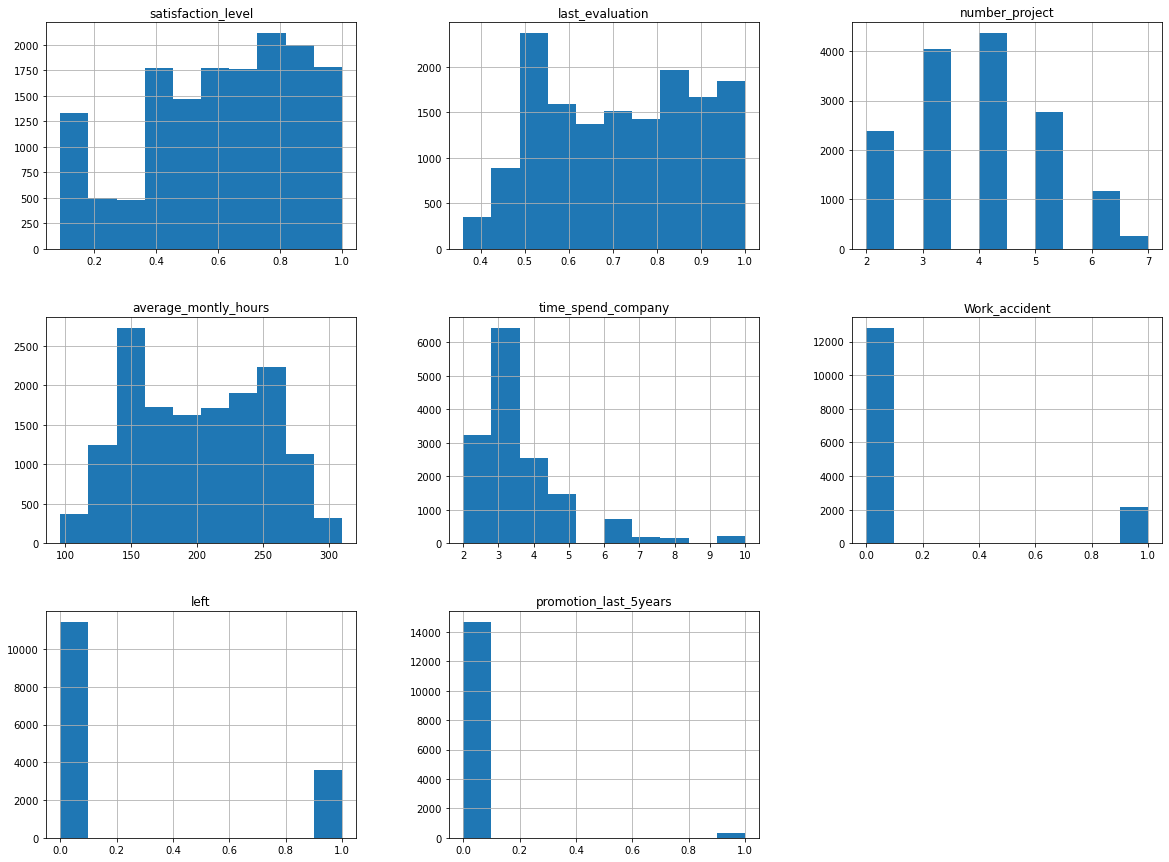

In [17]:
num_bins = 10
dataset.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

### Label Encoding

In [18]:
dataset.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [19]:
catcols = set(dataset.dtypes[dataset.dtypes=='object'].index.values)
print(catcols)

{'salary', 'Department'}


In [20]:
# Department: accounting-0, hr-1, management-2, marketing-3, product_mng-4, RandD-5, sales-6, technical-7
# Salary: high - 0, low - 1, medium - 2
from sklearn.preprocessing import LabelEncoder
from collections import Counter as c
x = '*'
for i in catcols:
    print('Label Encoding of: ', i)
    le = LabelEncoder()
    print(c(dataset[i]))
    dataset[i] = le.fit_transform(dataset[i])
    print(c(dataset[i]))
    print(x*100)

Label Encoding of:  salary
Counter({'low': 7316, 'medium': 6446, 'high': 1237})
Counter({1: 7316, 2: 6446, 0: 1237})
****************************************************************************************************
Label Encoding of:  Department
Counter({'technical': 6176, 'sales': 4140, 'product_mng': 902, 'marketing': 858, 'RandD': 787, 'accounting': 767, 'hr': 739, 'management': 630})
Counter({7: 6176, 6: 4140, 5: 902, 4: 858, 0: 787, 1: 767, 2: 739, 3: 630})
****************************************************************************************************


### Splitting the dataset into Dependent and Independent Variable

In [21]:
x = dataset.iloc[:,[0,1,2,3,4,5,7,8,9]]
y = dataset['left'].values

In [22]:
x.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'], dtype=object)

In [23]:
y

array([1, 1, 1, ..., 1, 1, 1])

### Split the dataset into Train Set and Test Set

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Training the Model
### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(x_test))))

Logistic regression accuracy: 0.768


### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(x_test))))

Random Forest Accuracy: 0.991


### 10 Fold Cross-Validation

In [29]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.990


### Precision and Recall

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3462
           1       0.99      0.97      0.98      1038

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


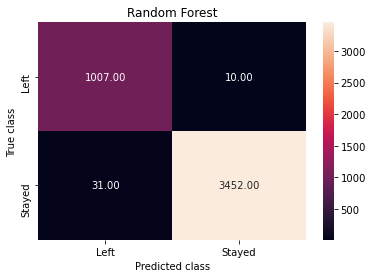

In [31]:
y_pred = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [32]:
print(classification_report(y_test, logreg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3462
           1       0.50      0.25      0.33      1038

    accuracy                           0.77      4500
   macro avg       0.65      0.59      0.60      4500
weighted avg       0.73      0.77      0.74      4500



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


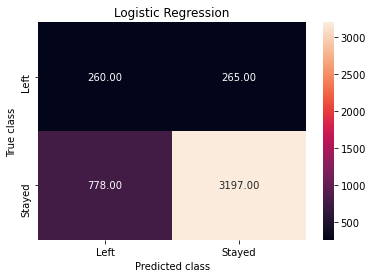

In [33]:
logreg_y_pred = logreg.predict(x_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

In [34]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}: {:.2f}% '.format(feature_labels[index], (importance[index] *100.0)))

department_hr: 0.10% 
department_RandD: 0.58% 
salary_high: 0.80% 
department_management: 0.98% 
last_evaluation: 12.77% 
Work_accident: 15.37% 
time_spend_company: 17.52% 
promotion_last_5years: 18.51% 
satisfaction_level: 33.38% 


### Checking prediction

In [35]:
x1 = np.array([[0.41, 0.46, 2, 128, 3, 0, 0, 0, 1]])

In [36]:
ypred = rf.predict(x1)
ypred

array([1])

In [37]:
ypred>0.5

array([ True])

In [38]:
x2 = np.array([[0.93, 0.53, 3, 200, 3, 1, 0, 4, 1]])

In [39]:
ypred = rf.predict(x2)
ypred

array([0])

In [40]:
ypred>0.5

array([False])

### Saving the model

In [41]:
import pickle
pickle.dump(rf, open('employee_prediction.pkl', 'wb'))